In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

588

In [6]:
# Import Dependencies
# Loop through dependencies
# Group cities in sets of 50 (we'll need two counters)
# Build the city url or endpoint for each city.
#Log the URL and the record  and set numbers.
# Make an API request for each city.
# Parse the JSON weather data for the following: City, country date, lat, lon, max temp, hum, cloud, wind
# Add the data to a list in a dictionary format and then convert the list to a DF.


In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bengkulu
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | tuatapere
Processing Record 4 of Set 1 | komsomolskiy
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | sosnovka
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 9 of Set 1 | belyy yar
Processing Record 10 of Set 1 | loningen
Processing Record 11 of Set 1 | ramhormoz
Processing Record 12 of Set 1 | khokholskiy
City not found. Skipping...
Processing Record 13 of Set 1 | denpasar
Processing Record 14 of Set 1 | solwezi
Processing Record 15 of Set 1 | ordu
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | tasiilaq
Processing Record 19 of Set 1 | westport
Processing Record 20 of Set 1 | warqla
City not found. Skipping...
Processing Record 21 of Set 1 | barrow


Processing Record 37 of Set 4 | longyearbyen
Processing Record 38 of Set 4 | hithadhoo
Processing Record 39 of Set 4 | kargil
Processing Record 40 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 41 of Set 4 | karaul
City not found. Skipping...
Processing Record 42 of Set 4 | uaua
Processing Record 43 of Set 4 | katsuura
Processing Record 44 of Set 4 | macklin
Processing Record 45 of Set 4 | kovdor
Processing Record 46 of Set 4 | malkangiri
Processing Record 47 of Set 4 | saldanha
Processing Record 48 of Set 4 | khatanga
Processing Record 49 of Set 4 | sibolga
Processing Record 50 of Set 4 | namibe
Processing Record 1 of Set 5 | qaqortoq
Processing Record 2 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Record 3 of Set 5 | airai
Processing Record 4 of Set 5 | kota tinggi
Processing Record 5 of Set 5 | cabo san lucas
Processing Record 6 of Set 5 | mayo
Processing Record 7 of Set 5 | taoudenni
Processing Record 8 of Set 5 | padang
Processing Record 9 o

Processing Record 32 of Set 8 | katangli
Processing Record 33 of Set 8 | wynyard
Processing Record 34 of Set 8 | cururupu
Processing Record 35 of Set 8 | pleasanton
Processing Record 36 of Set 8 | marquette
Processing Record 37 of Set 8 | tomatlan
Processing Record 38 of Set 8 | vestmannaeyjar
Processing Record 39 of Set 8 | moses lake
Processing Record 40 of Set 8 | morelia
Processing Record 41 of Set 8 | cordoba
Processing Record 42 of Set 8 | rorvik
Processing Record 43 of Set 8 | rairangpur
Processing Record 44 of Set 8 | brasilia de minas
Processing Record 45 of Set 8 | lufilufi
Processing Record 46 of Set 8 | neyshabur
Processing Record 47 of Set 8 | lavrentiya
Processing Record 48 of Set 8 | olafsvik
Processing Record 49 of Set 8 | hambantota
Processing Record 50 of Set 8 | turbat
Processing Record 1 of Set 9 | isangel
Processing Record 2 of Set 9 | erenhot
Processing Record 3 of Set 9 | buala
Processing Record 4 of Set 9 | torbay
Processing Record 5 of Set 9 | banja koviljaca
P

Processing Record 21 of Set 12 | meyungs
City not found. Skipping...
Processing Record 22 of Set 12 | sept-iles
Processing Record 23 of Set 12 | didao
Processing Record 24 of Set 12 | colquiri
Processing Record 25 of Set 12 | kamenskoye
City not found. Skipping...
Processing Record 26 of Set 12 | mizdah
Processing Record 27 of Set 12 | cockburn town
Processing Record 28 of Set 12 | flinders
Processing Record 29 of Set 12 | nishihara
Processing Record 30 of Set 12 | ludvika
Processing Record 31 of Set 12 | erzin
Processing Record 32 of Set 12 | povenets
Processing Record 33 of Set 12 | bathsheba
Processing Record 34 of Set 12 | gilazi
City not found. Skipping...
Processing Record 35 of Set 12 | muravlenko
Processing Record 36 of Set 12 | alpena
Processing Record 37 of Set 12 | rahden
Processing Record 38 of Set 12 | salaverry
-----------------------------
Data Retrieval Complete      
-----------------------------


In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bengkulu,-3.8004,102.2655,77.04,89,100,4.79,ID,2021-12-03 18:57:52
1,Hermanus,-34.4187,19.2345,64.90,71,8,14.16,ZA,2021-12-03 18:57:06
2,Tuatapere,-46.1333,167.6833,58.82,93,100,3.22,NZ,2021-12-03 18:57:53
3,Komsomolskiy,40.4272,71.7189,43.52,52,100,6.91,UZ,2021-12-03 18:57:53
4,Hilo,19.7297,-155.0900,79.11,80,13,4.92,US,2021-12-03 18:57:27
5,Sosnovka,56.2550,51.2842,34.38,91,100,8.95,RU,2021-12-03 18:57:53
6,Rikitea,-23.1203,-134.9692,76.23,75,3,16.82,PF,2021-12-03 18:57:54
7,Belyy Yar,53.6039,91.3903,15.85,72,100,2.24,RU,2021-12-03 18:57:54
8,Loningen,52.7333,7.7667,39.22,89,100,20.02,DE,2021-12-03 18:57:54
9,Ramhormoz,31.2800,49.6035,62.67,43,3,5.46,IR,2021-12-03 18:57:55


In [12]:
len(city_data)

548

In [15]:
# Reorder the columns 
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bengkulu,ID,2021-12-03 18:57:52,-3.8004,102.2655,77.04,89,100,4.79
1,Hermanus,ZA,2021-12-03 18:57:06,-34.4187,19.2345,64.90,71,8,14.16
2,Tuatapere,NZ,2021-12-03 18:57:53,-46.1333,167.6833,58.82,93,100,3.22
3,Komsomolskiy,UZ,2021-12-03 18:57:53,40.4272,71.7189,43.52,52,100,6.91
4,Hilo,US,2021-12-03 18:57:27,19.7297,-155.0900,79.11,80,13,4.92


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

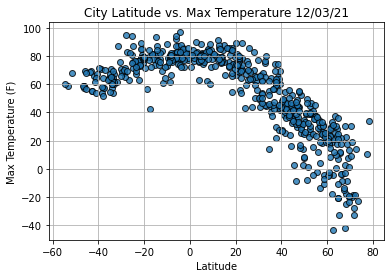

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

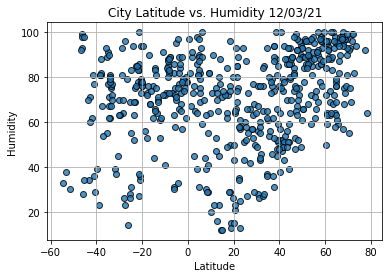

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

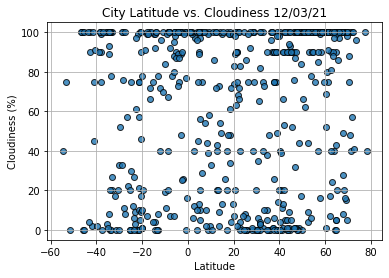

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

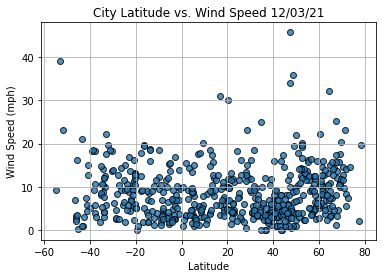

In [23]:
# Import time module
import time

# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig5.png")

# Show plot.
plt.show()